In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Test_Model_1 import WNVParameters

ModuleNotFoundError: No module named 'Test_Model_1'

In [14]:
# # Define the WNVParameters class
# class WNVParameters:
#     def __init__(self):
#         self.transovarial_rate = 0.05  # Probability of vertical transmission in mosquitoes
#         self.mosquito_life_span = 15  # Average lifespan of mosquitoes in days
#         self.bird_life_span = 365  # Average lifespan of birds in days
#         self.initial_mosquito_count = 40716
#         self.initial_bird_count = 15296
#         self.initial_infectious_fraction = 0.1
#         self.recovery_rate = 0.05  # Probability of recovery for infected birds
#         self.grid_width = 921
#         self.grid_height = 393
#         self.startDOY = 1
#         self.simulation_steps = 360

#     def mosquito_abundance_probability(self, T):
#         optimal_temp = 25  # Optimal temperature for Culex mosquitoes
#         sigma = 5
#         if T >= optimal_temp :
#             sigma = 9  # Controls the width of the peak around the optimal temperature
#         temp_factor = np.exp(-0.5 * ((T - optimal_temp) / sigma) ** 2)  # Gaussian function for temperature
#         temp_factor = np.clip(temp_factor, 0, 1)  # Ensuring values are between 0 and 1
#         return temp_factor * (1 - (T - 25) / 26)  # Gradually decrease after 26

#     ##################################################

#     def mosquito_birth_rate(self, T, P):
#         optimal_temp = 25  # Optimal temperature for Culex mosquitoes
#         lower_temp_limit = 10  # Lower temperature threshold for breeding
#         upper_temp_limit = 40  # Upper temperature threshold for breeding
#         optimal_precip = 70  # Optimal precipitation for mosquito breeding
#         lower_precip_limit = 45  # Lower precipitation threshold for breeding
#         upper_precip_limit = 95  # Upper precipitation threshold for breeding

#         temp_factor = np.where(T < lower_temp_limit,
#                                 0.2,  # Higher mortality with very low precipitation
#                                 np.where(T <= upper_temp_limit,
#                                         np.exp(-0.015 * (T - optimal_temp) ** 2),  # Lower mortality near optimal temperature
#                                         0.2))  # Higher mortality with very high precipitation
        
#         precip_factor = np.where(P < lower_precip_limit,
#                                 0.2,  # Higher mortality with very low precipitation
#                                 np.where(P <= upper_precip_limit,
#                                         np.exp(-0.0005 * (P - optimal_precip) ** 2),  # Lower mortality near optimal precipitation
#                                         0.2))  # Higher mortality with very high precipitation

#         # Combine factors with a baseline birth rate
#         return 0.05 * temp_factor * precip_factor

#     def mosquito_death_rate(self, T, P):
#         optimal_temp = 25  # Optimal temperature for Culex mosquitoes
#         lower_temp_limit = 10  # Lower temperature limit for mosquito survival
#         upper_temp_limit = 45  # Upper temperature limit for mosquito survival
#         optimal_precip = 70  # Optimal precipitation for mosquito survival
#         lower_precip_limit = 45  # Lower precipitation limit for mosquito survival
#         upper_precip_limit = 95  # Upper precipitation limit for mosquito survival

#         temp_factor = np.where(T < lower_temp_limit,
#                                 0.6,  # Higher mortality with very low precipitation
#                                 np.where(T <= upper_temp_limit,
#                                         1 - np.exp(-0.005 * (T - optimal_temp) ** 2),  # Lower mortality near optimal temperature
#                                         0.6))  # Higher mortality with very high precipitation
        
#         precip_factor = np.where(P < lower_precip_limit,
#                                 0.6,  # Higher mortality with very low precipitation
#                                 np.where(P <= upper_precip_limit,
#                                         1 - np.exp(-0.005 * (P - optimal_precip) ** 2),  # Lower mortality near optimal precipitation
#                                         0.6))  # Higher mortality with very high precipitation

#         # Combine factors with a baseline death rate
#         return 0.01 + 0.06 * temp_factor * precip_factor

#     ##################################################

#     def bird_birth_rate(self, T, P):
#         optimal_temp = 25  # Optimal temperature for American crows
#         variance = 0.008  # Decrease this value to make the curve wider
#         temp_factor = np.exp(-variance * (T - optimal_temp) ** 2)  # Gaussian function for temperature
#         return 0.05 * temp_factor * 0.5  # Decrease multiplier to make the peak lower

#     def bird_death_rate(self, T):
#         optimal_temp = 35  # Optimal temperature for American crows
#         spread = 10  # Spread factor to control the steepness of the curve
#         temp_factor = np.exp(-((T - optimal_temp) ** 2) / (2 * spread ** 2))
#         # Adjusted to make the minimum death rate higher
#         return 0.05 * (1 - temp_factor)
    
#     def egg_to_larvae_rate(self, T, P):
#         optimal_temp = 25  # Optimal temperature for mosquito eggs
#         optimal_precip = 70  # Optimal precipitation for mosquito breeding
#         temp_factor = np.exp(-0.02 * (T - optimal_temp) ** 2)  # Wider Gaussian function for temperature
#         precip_factor = np.exp(-0.01 * (P - optimal_precip) ** 2)  # Wider Gaussian function for precipitation
#         return 0.1 + 0.2 * temp_factor * precip_factor

#     ##################################################

#     def infection_probability(self, T):
#         optimal_temp = 25  # Optimal temperature for WNV transmission
#         spread = 10  # Spread factor to control the steepness of the curve
#         temp_factor = np.exp(-((T - optimal_temp) ** 2) / (2 * spread ** 2))
#         return 0.1 * temp_factor
    


# Instantiate the model
model = WNVParameters()

# Plot each function
def plot_surface(Z, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T, P, Z, cmap='viridis')
    ax.set_xlabel('Temperature (T)')
    ax.set_ylabel('Precipitation (P)')
    ax.set_zlabel(title)
    plt.title(title)
    plt.show()

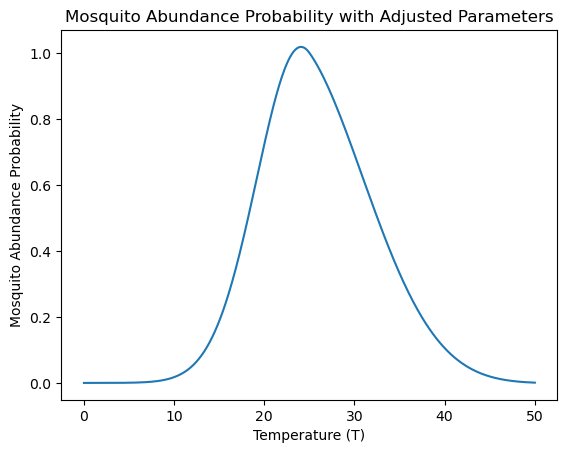

In [4]:
T_values = np.linspace(0, 50, 500)
probabilities = [model.mosquito_abundance_probability(T) for T in T_values]

plt.plot(T_values, probabilities)
plt.xlabel('Temperature (T)')
plt.ylabel('Mosquito Abundance Probability')
plt.title('Mosquito Abundance Probability with Adjusted Parameters')
plt.show()

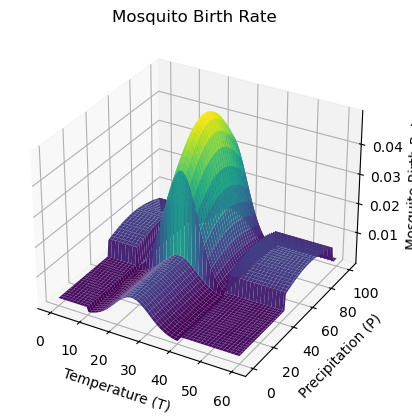

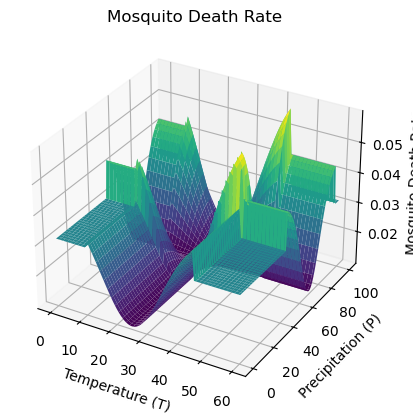

In [15]:
# Generate data
T_range = np.linspace(0, 60, 100)
P_range = np.linspace(0, 100, 100)
T, P = np.meshgrid(T_range, P_range)

# Plot mosquito birth rate
Z = model.mosquito_birth_rate(T, P)
plot_surface(Z, 'Mosquito Birth Rate')

Z = model.mosquito_death_rate(T, P)
plot_surface(Z, 'Mosquito Death Rate')

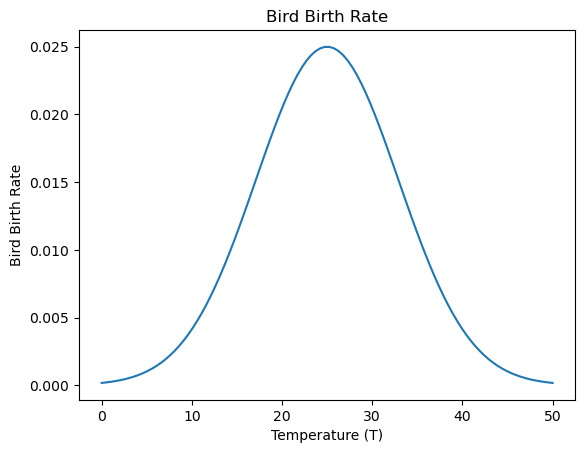

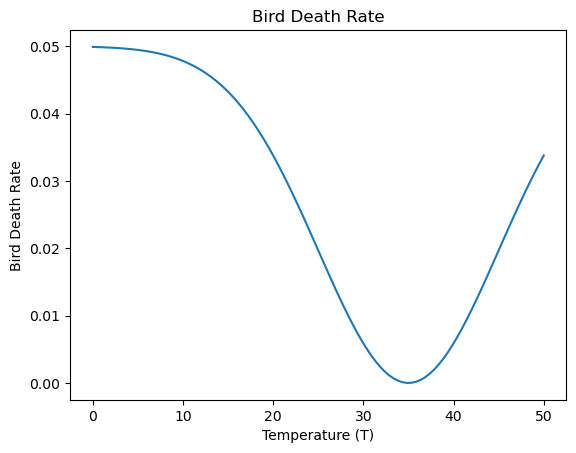

In [9]:

# Plot bird birth rate (only T, so no precipitation)
T_bird = np.linspace(0, 50, 100)
P_bird = np.linspace(0, 100, 100)
Z_bird = model.bird_birth_rate(T_bird, P_bird)
plt.figure()
plt.plot(T_bird, Z_bird)
plt.xlabel('Temperature (T)')
plt.ylabel('Bird Birth Rate')
plt.title('Bird Birth Rate')
plt.show()

# Plot bird death rate (only T, so no precipitation)
Z_bird_death = model.bird_death_rate(T_bird)
plt.figure()
plt.plot(T_bird, Z_bird_death)
plt.xlabel('Temperature (T)')
plt.ylabel('Bird Death Rate')
plt.title('Bird Death Rate')
plt.show()

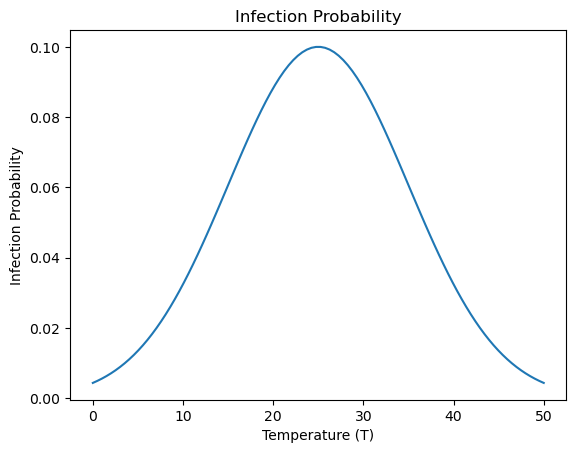

In [7]:
Z_infection = model.infection_probability(T_bird)
plt.figure()
plt.plot(T_bird, Z_infection)
plt.xlabel('Temperature (T)')
plt.ylabel('Infection Probability')
plt.title('Infection Probability')
plt.show()